In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap, TSNE
from sklearn.datasets import make_swiss_roll
from time import time

In [10]:
X_org, color = make_swiss_roll(1200)

In [11]:
n_components = 2
n_neighbors = 10
n_obj = 20

In [14]:
print(X_org.shape)
print(X_org[:3])
print(color.shape)
print(color[:3])

(1200, 3)
[[12.59535725  6.7187242   1.51339291]
 [-9.35216074 15.07762984 -2.53399489]
 [-9.01539973  1.02057025 -3.93362361]]
(1200,)
[12.68595216  9.68937772  9.83619982]


In [15]:
sc = StandardScaler()
X = sc.fit_transform(X_org) 

PCA ...
MDS ...
Isomap ...
LLE ...
t-SNE ...


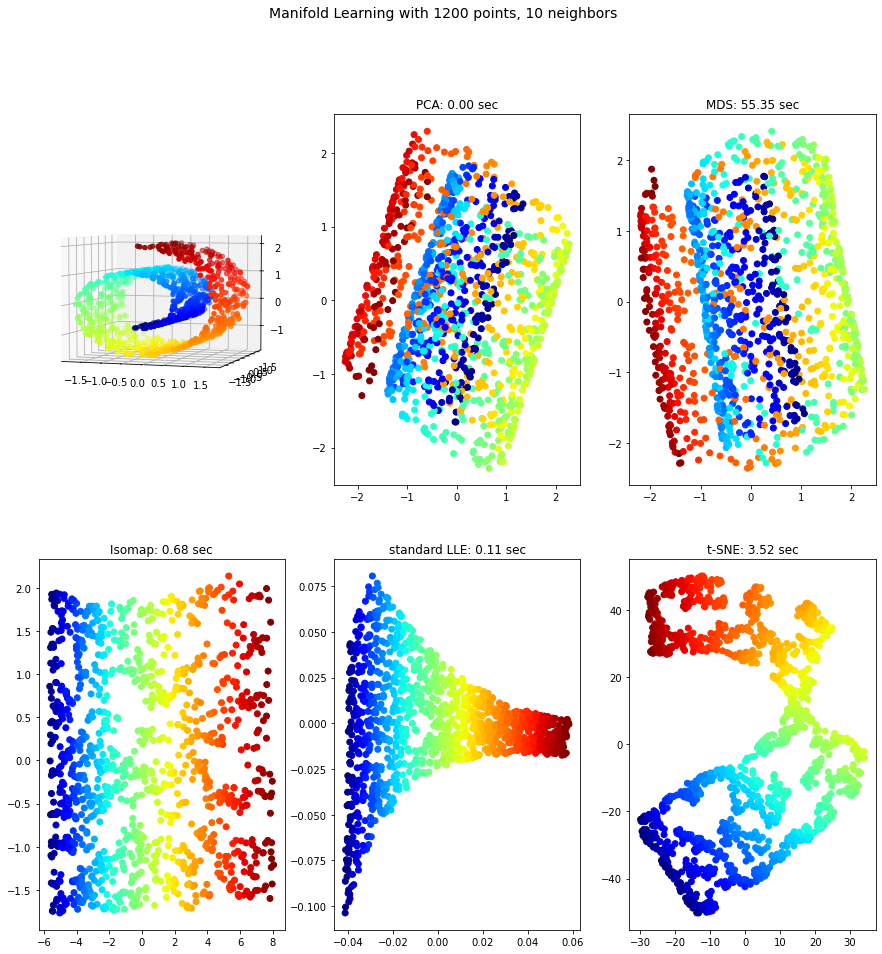

In [19]:
fig = plt.figure(figsize=(15, 15))
title = 'Manifold Learning'
title += ' with {} points,'.format(1200)
title += ' {} neighbors'.format(n_neighbors)
plt.suptitle(title, fontsize=14)

# 3D s_curve
ax = fig.add_subplot(2,3,1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.jet)
ax.view_init(4, -72)

# PCA
print('PCA ...')
t0 = time()
Y = PCA(n_components=n_components).fit_transform(X)
t1 = time()
ax = fig.add_subplot(2,3,2)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.jet)
plt.title("PCA: {:.2f} sec".format(t1-t0))

# MDS
print('MDS ...')
t0 = time()
Y = MDS(n_components=n_components, random_state=0).fit_transform(X)
t1 = time()
ax = fig.add_subplot(2,3,3)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.jet)
plt.title("MDS: {:.2f} sec".format(t1-t0))

# Isomap
print('Isomap ...')
t0 = time()
Y = Isomap(n_neighbors=n_neighbors, n_components=n_components).fit_transform(X)
t1 = time()
ax = fig.add_subplot(2,3,4)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.jet)
plt.title("Isomap: {:.2f} sec".format(t1-t0))

# LLE
print('LLE ...')
t0 = time()
Y = LocallyLinearEmbedding(n_neighbors=n_neighbors,
                           n_components=n_components,
                           eigen_solver='auto',
                           method='standard').fit_transform(X)
t1 = time()
ax = fig.add_subplot(2,3,5)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.jet)
plt.title("standard LLE: {:.2f} sec".format(t1-t0))

# t-SNE
print('t-SNE ...')
t0 = time()
Y = TSNE(n_components=n_components,
         perplexity=30, n_iter=1000,
         random_state=0).fit_transform(X)
t1 = time()
ax = fig.add_subplot(2,3,6)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.jet)
plt.title("t-SNE: {:.2f} sec".format(t1-t0))

plt.show()